<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/W2_D2_Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

**Group members:**

*   Nada Alzahrani
*   Shaima Alamri
*   Afrah Alharbi
*   Abeer Alghamdi



1. Load in your dataset through its CSV link.

In [ ]:
import pandas as pd
import seaborn as sns

df= pd.read_csv("https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv")

df.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


2. Find out some information about the data...

In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,height,weight,target
count,200.000000,200.000000,200.000000
mean,47.480000,106.830000,0.500000
std,18.415353,38.636836,0.501255
min,25.000000,40.000000,0.000000
25%,32.000000,80.000000,0.000000
50%,43.000000,99.000000,0.500000
75%,62.250000,141.000000,1.000000
max,84.000000,179.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  200 non-null    float64
 1   weight  200 non-null    float64
 2   target  200 non-null    float64
 3   type    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.isnull().sum()

height    0
weight    0
target    0
type      0
dtype: int64

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [ ]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,height,weight,target
height,1.000000,0.703149,0.842168
weight,0.703149,1.000000,0.771663
target,0.842168,0.771663,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


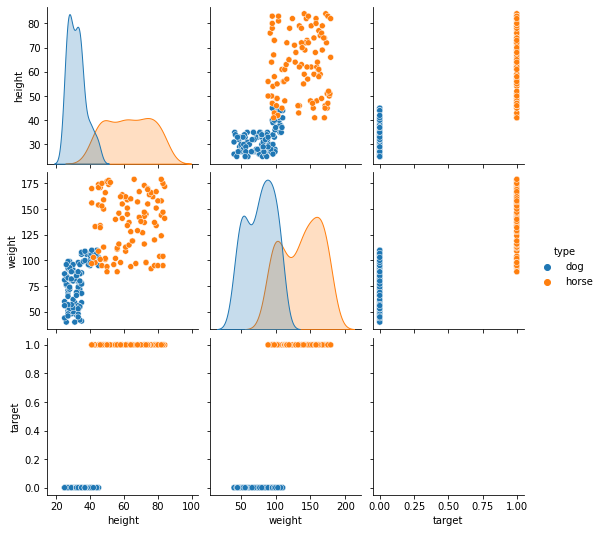

In [ ]:
sns.pairplot(df, hue='type')

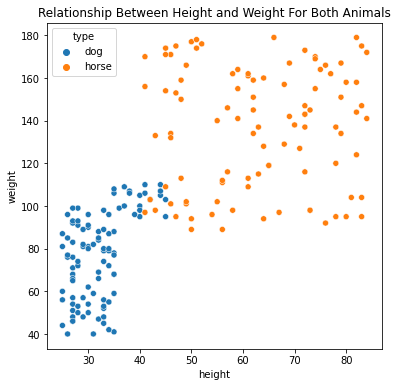

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(x=df.height , y = df.weight , hue=df.type).set(title = 'Relationship Between Height and Weight For Both Animals');


In [ ]:
df.target.value_counts()

1.0    100
0.0    100
Name: target, dtype: int64

In [ ]:
df.type.value_counts()

horse    100
dog      100
Name: type, dtype: int64

4. Split your data into training and testing datasets...

In [ ]:
df.columns

Index(['height', 'weight', 'target', 'type'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['height']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [ ]:
preds=lr.predict(X_test)

In [ ]:
# what do they look like? (show me some of the predictions)
preds

array([0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1.])

7. Score your model...
- accuracy_score
- confusion_matrix

In [ ]:
from sklearn.metrics import *

accuracy_score(y_test, preds)

0.9666666666666667

In [ ]:
confusion_matrix(y_test, preds)

array([[29,  2],
       [ 0, 29]])

In [ ]:
# show confusion_matrix
df_crosstab = pd.crosstab(preds,y_test)
df_crosstab

target,0.0,1.0
row_0,,
0.0,29,0
1.0,2,29


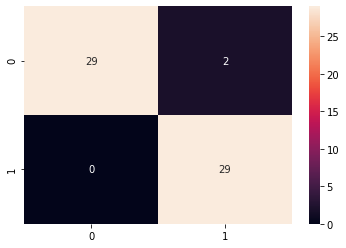

In [ ]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True);

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [ ]:
X = df[['height','weight']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state = 42)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [ ]:
preds=lr.predict(X_test)

In [ ]:
# what do they look like? (show me some of the predictions)
preds

array([0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1.])

10. Score your model...
- accuracy_score
- confusion_matrix

In [ ]:
accuracy_score(y_test, preds)

0.95

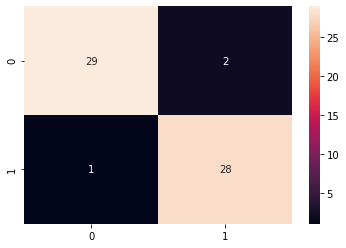

In [ ]:
sns.heatmap(confusion_matrix(y_test, preds),annot=True);

11. Which model is better? Why?

*   **We can not determine which model is better because we have a dataset with 
limited features and correlation to target feature**

12. Perform GridSearchCV with the better data

In [ ]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'solver':[ "newton-cg", "lbfgs", "liblinear", "sag", "saga"],
          'max_iter': [100, 150, 200,250,500, 10000]
}

grid = GridSearchCV(lr, p_grid, cv=7)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 150, 200, 250, 500, 10000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=Non

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [ ]:
from sklearn.metrics import  confusion_matrix

lr = LogisticRegression(fit_intercept=True, max_iter= 100,solver = 'newton-cg' )

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lr = lr.predict(X_test)

14. Score the new model... 
- r2_score
- some other metric of your choice

In [ ]:
accuracy_score(y_test, preds)

0.95

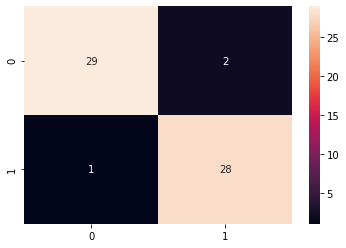

In [ ]:
sns.heatmap(confusion_matrix(y_test, preds),annot=True);

Did the score change at all? Why?

Its same the accuracy did not change.

## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=250)

In [ ]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=250, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgdc.predict(X_test)

array([0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
preds = sgdc.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

0.6